In [1]:
# import built functions
import env
import wrangle
import explore
import model
# import libariess 
import pandas as pd
from fredapi import Fred
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# GDP based Wrangle
- This is data collection and cleaning will solely focus on the GDP based method to define the recession

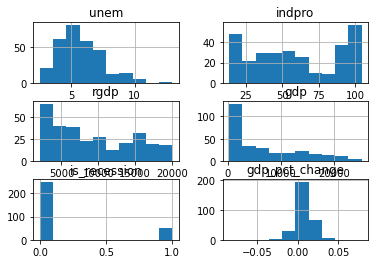

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 298 entries, 1948-01-01 to 2022-04-01
Freq: QS-OCT
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unem            298 non-null    float64
 1   indpro          298 non-null    float64
 2   rgdp            298 non-null    float64
 3   gdp             298 non-null    float64
 4   is_recession    298 non-null    float64
 5   gdp_pct_change  298 non-null    float64
dtypes: float64(6)
memory usage: 16.3 KB


In [2]:
# Use the wrangle.py function to collect unemployment rate, 
# industrial production, real gdp, gdp, and recession dates.
# all null values will be dropped
gdp_based_df=wrangle.gdp_based()
gdp_based_df.hist()
# The data on unemployment is one of the declines in GDP that could lead to an increasing unemployment rate; 
# therefore, two consecutive declines in GDP would lead to a recession
# Industrial Production is the other key point that can be used to forecast the GDP 
# because the decline in the output of the key sector means a decline in the GDP
# Real GDP, which relects inflation
# GDP
# whether the National Bureau of Economic Research, 
# which is the independent research organization to announce whether the United Staes is in the Recession officially
plt.show()
gdp_based_df.info()

In [3]:
# split the data into train, validate, and test for exploration purposes. 
# Since the index is time-based, the split will be by-time instead of random.
gdp_train,gdp_validate,gdp_test,gdp_train_val=wrangle.split_gdp_based(gdp_based_df)

In [4]:
# column is_recession, value 1 means there is recession ongoing, 0 means there is no recession ongoing.
gdp_train_val.tail()

,unem,indpro,rgdp,gdp,is_recession,gdp_pct_change
quarterly,,,,,,
2002-07-01,5.733333,90.698200,13531.741,10984.040,0.0,0.004035
2002-10-01,5.866667,90.654033,13549.421,11061.433,0.0,0.001307
2003-01-01,5.866667,91.215633,13619.434,11174.129,0.0,0.005167
2003-04-01,6.133333,90.516967,13741.107,11312.766,0.0,0.008934
2003-07-01,6.133333,91.117300,13970.157,11566.669,0.0,0.016669


## wrangle Key takeaway
- we have 223 quarters of data since 1948 for GDP-based data frame
- The real GDP growth rate increased from 2002Q1 after the recession; however, the unemployment rate was also rising
- Based on the natural rate of unemployment in 2003, based on the Congressional Budget Office, it should be 5%, which is above the health leave, and the recession is 0, which means there is no recession [^1](#footnote)

# GDP based Exploration

#### Whether the GDP has a strong correlation with the recession?

<AxesSubplot:>

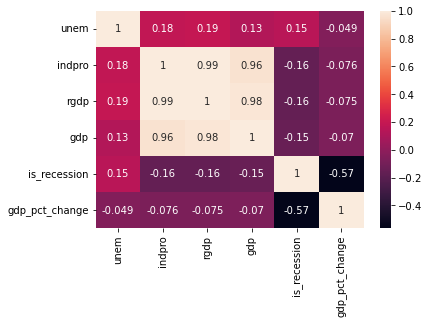

In [5]:
# see correlation
sns.heatmap(data=gdp_train_val.corr(),annot=True)

#### Take away
- The percentage change has an inverse correlation to recession.
- The correlation does not imply causation, but the causation is definite proof of correlation. Therefore, it is worth examining further.[^2](#footnote)


####  Whether the GDP decline two consecutive quarters during the recession?

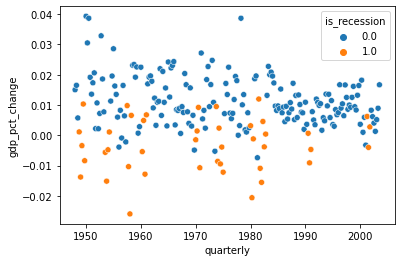

In [6]:
# compare quarter and gdp_pct_change
sns.scatterplot(data=gdp_train_val,x='quarterly',y='gdp_pct_change',hue='is_recession')
plt.show()

#### Key takeaway
- When there is no recession, we can see via the visualization that there is still a significant drop in the GDP(likely seasonal outcome), but it rarely drops below 0 pct_change
- When there is a recession, the pct_change drop below 0, most of which are located below 0.
- Based on the graph, some of them rarely are above zero, but there are positive GDP during the recession

#### Can the unem versus GDP reveal that the nation is in a recession?

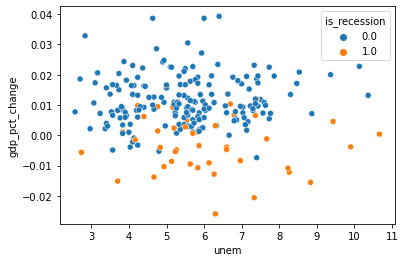

In [7]:
# scatter plot the unem, and gdp_pct_change
sns.scatterplot(data=gdp_train_val,x='unem',y='gdp_pct_change',hue='is_recession')
plt.show()

#### Key takeaway
- The graph showed a controversial phenomenon that the recession can push the unemployment rate to a high level, but it depicted that it is not the case.
- The graph also showed that the low unemployment rate could also means a recession

#### Hypothesis: Suppose the average two consecutive GDP in a recession is the greater than the average two consecutive GDP in no recession. In that case, the general definition of two consecutive declines in two consecutive GDP is false.
    H0= The average two consecutive GDP in a recession is the same or greater than the average two consecutive GDP in no recession
    Ha= The average two consecutive GDP in a recession is the less than the average two consecutive GDP in no recession
    set alpha =0.05,(confidence level 95%)

In [8]:
# getting two quarters data 
gdp_train_val=gdp_train_val.resample('2Q').agg('sum')
gdp_train_val.is_recession=gdp_train_val.is_recession.replace(2,1)

In [9]:
# check normality to find out which stat test we are going to use
explore.norm(gdp_train_val)

we assume the distribution of our variable is not normal/gaussian


The average two consecutive GDP in a recession is not the same as the average two consecutive GDP in no recession


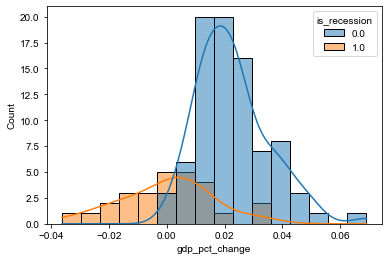

In [10]:
# use built function for the test
explore.hypo1(gdp_train_val)

### Key Takeaway
- The hypothesis test was based on the GDP percentage change, which concluded that the average GDP in a recession is the same or less than the average GDP in no recession. Suppose the average two consecutive GDP in a recession is the greater than the average two consecutive GDP in no recession. In that case, the general definition of two consecutive declines in two consecutive GDPs is false.

# GDP-based Exploration key takeaway
- In general, the data did show favor for two consecutive declines in GDP to call it a recession.
- The United States NBER used a different formula to call the recession; however, as noted in [README](https://github.com/QinzhiChen/individual_project), it could take a few months for NBER to announce it.
- The high unemployment rate doesn't mean there is a recession.
- The United States does not use the GDP-based formula to determine the recession, but an official determination came from NBER. Therefore, the hypothesis t-test can pass the null hypothesis.

# general data based Wrangle

- Use general economy data such as CPI, [money supply](https://www.stlouisfed.org/education/feducation-video-series/episode-1-money-and-inflation), Core CPI, GDP deflator,unemployment rate, industrial production, PCE to determine the recession.
- The general belief came from a recent event that high inflation caused tight monetary policies, which is a general view that will cause a recession
- This dataset is from some key [inflation](https://github.com/QinzhiChen/individual_project/blob/main/README.md#term-defination) data, believed to be used for determining the federal interest rate.

In [11]:
# acuiqre the data use built function
gen_based=wrangle.gen_based()

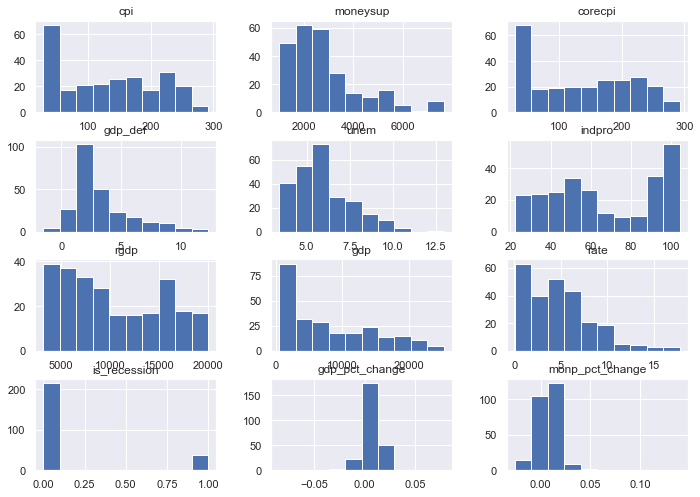

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 1959-04-01 to 2022-04-01
Freq: QS-OCT
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cpi              253 non-null    float64
 1   moneysup         253 non-null    float64
 2   corecpi          253 non-null    float64
 3   gdp_def          253 non-null    float64
 4   unem             253 non-null    float64
 5   indpro           253 non-null    float64
 6   rgdp             253 non-null    float64
 7   gdp              253 non-null    float64
 8   rate             253 non-null    float64
 9   is_recession     253 non-null    float64
 10  gdp_pct_change   253 non-null    float64
 11  monp_pct_change  253 non-null    float64
dtypes: float64(12)
memory usage: 25.7 KB


In [12]:
# basic info
gen_based.hist()
plt.show()
gen_based.info()

In [13]:
# split the data
gen_train,gen_validate,gen_test,gen_train_val=wrangle.split_gen_based(gen_based)

In [14]:
gen_train_val.head()

,cpi,moneysup,corecpi,gdp_def,unem,indpro,rgdp,gdp,rate,is_recession,gdp_pct_change,monp_pct_change
quarterly,,,,,,,,,,,,
1959-04-01,29.043333,1005.833333,30.100000,0.6,5.100000,23.497200,3194.429,522.653,3.083333,0.0,0.022552,0.013162
1959-07-01,29.193333,1014.300000,30.233333,1.5,5.266667,22.536100,3196.683,525.034,3.576667,0.0,0.000706,0.008418
1959-10-01,29.370000,1011.700000,30.433333,1.6,5.600000,22.643900,3205.790,528.600,3.990000,0.0,0.002849,-0.002563
1960-01-01,29.396667,1015.866667,30.566667,1.6,5.133333,24.009167,3277.847,542.648,3.933333,0.0,0.022477,0.004118
1960-04-01,29.573333,1018.133333,30.633333,1.0,5.233333,23.488200,3260.177,541.080,3.696667,1.0,-0.005391,0.002231


# General Data Wrangle key Takeaway
- we see money supply change while there is no recession
- next step should consider comparing [GDP deflator](https://github.com/QinzhiChen/individual_project/blob/main/README.md#term-defination) with the money supply

## General data Exploration

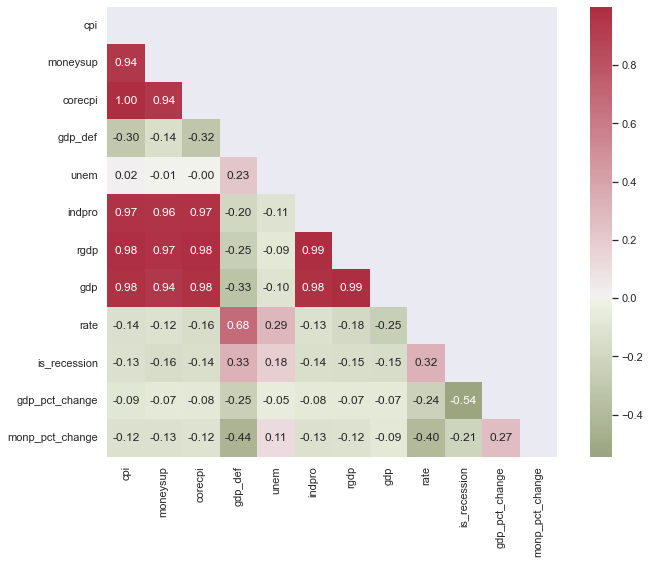

In [15]:
# check correlation
mask = np.triu(np.ones_like(gen_train_val.corr(), dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)
sns.heatmap(data=gen_train_val.corr(),mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
plt.show()

### Key takeaway
- The gdp_deflator(.33) and interest rate(.32) have a positive relationship with recession.
- The GDP deflator has a positive relationship with the interest rate: .68.
- GDP percentage change has a .54 positive relationship with recession.

### Whether high interest means high inflation?

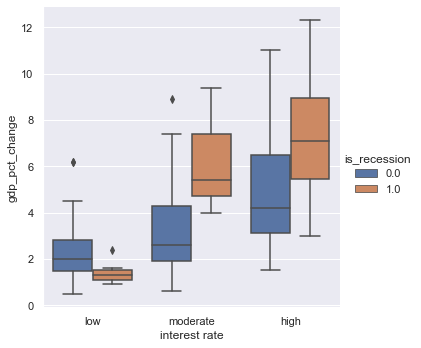

In [16]:
# use built in function to explore 
explore.bin_plot(gen_train_val)

### Key Takeway
- Historically, low-interest rates and low GDP deflators are less likely to have a recession
- High-interest rates with moderate to high GDP deflator seemly have both recession and non-recession data
- The high interest rates mean there has high inflation

#### Reasoning 
- The current market thinks that the increasing interest rate could cause a recession, and based on the [conference-Board](https://www.conference-board.org/pdfdownload.cfm?masterProductID=40118) that there is an almost 96% chance the recession would come by the end of this year
- So, if we use this to conduct a hypothesis test
- let's assume at the end of this year that the recession is definite, which is_recession will equal to 1
- Then, we can predict the probability of how high the interest rate needs to be in order to become a recession
- which requires that the interest rate to be the normal distribution, then we are going to use the Shapiro-Wilk test; if the Shapiro-Wilk test proves the normal distribution is true, then we are going to use the Cumulative Function Density test

### Hypothesis: 
- If the p-value ≤ α, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.
- If the p-value > α, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.
- α= 0.05

In [17]:
# use built function to test the distribution normality 
explore.genhypo1(gen_based)

we assume the distribution of our variable is normal/gaussian.


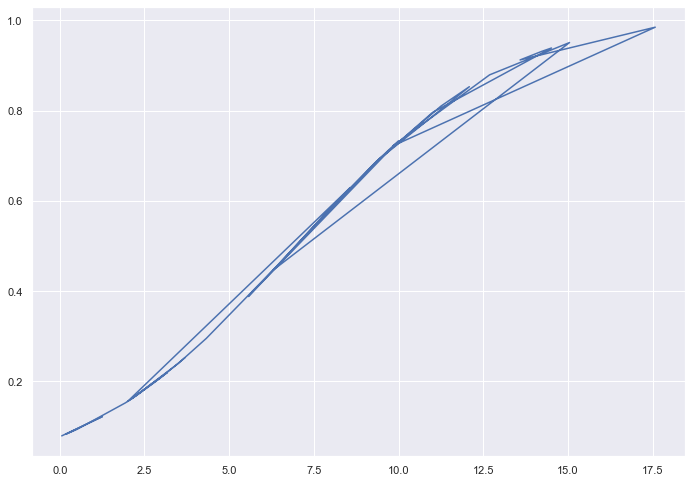

In [18]:
# check cumulative Function Density Test
pro=gen_based[gen_based.is_recession==1]
mean=pro.rate.mean()
std=pro.rate.std()
plt.plot(pro.rate, norm.cdf(pro.rate, loc=mean, scale=std))
plt.show()

### Key Takeaway
- Historically, if the recession is definite, then the probability of the interest rate being above 5 is less than 40%
- This is not an ends all test but gives an interesting viewpoint about a current increase rate hike
- Note, this test is solely based on assuming that the interest rate is one single factor for the recession.

## Gen based key Takeaway
- The interest rate shouldn't be a single facor to determine the recession
- The higher the interest rate, the likely there are high inflation 

# NBER  based wrangling

#### Based on 2008 [NBER data](https://www.nber.org/news/business-cycle-dating-committee-announcement-september-20-2010) The follow data will be acquired 

    Quarterly Data
    GDP, NIPA Table 1.1.6
    GDI, NIPA Table 1.7.6
    Monthly Data
    Real manufacturing and trade salesassociated with change from NAICS to SIC
    Index of industrial production, Board of Governors of the Federal Reserve System 
    Real personal income less transfers
    Aggregate weekly hours index in total private industries , BLS Series CES0500000016
    Payroll survey employment, BLS Series CES0000000001
    Household survey employment, BLS Series LNS12000000

In [19]:
# Due to the availability of data, certain data set was not able to retrieve, and those data are monthly based on GDP, 
# but since we are doing a quarterly review, this data most likely will not impact the result
nber_based=wrangle.nber_based()

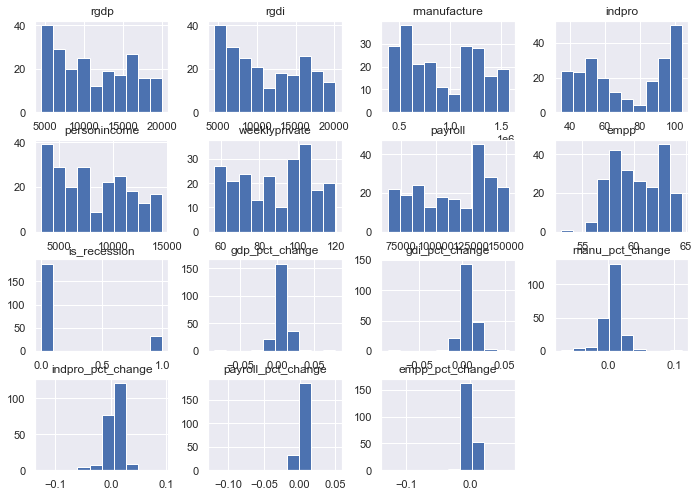

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 221 entries, 1967-04-01 to 2022-04-01
Freq: QS-OCT
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rgdp                221 non-null    float64
 1   rgdi                221 non-null    float64
 2   rmanufacture        221 non-null    float64
 3   indpro              221 non-null    float64
 4   personincome        221 non-null    float64
 5   weeklyprivate       221 non-null    float64
 6   payroll             221 non-null    float64
 7   empp                221 non-null    float64
 8   is_recession        221 non-null    float64
 9   gdp_pct_change      221 non-null    float64
 10  gdi_pct_change      221 non-null    float64
 11  manu_pct_change     221 non-null    float64
 12  indpro_pct_change   221 non-null    float64
 13  payroll_pct_change  221 non-null    float64
 14  empp_pct_change     221 non-null    float64
dtypes: float64(15)
memory usa

In [20]:
# get basic information
nber_based.hist()
plt.show(),
nber_based.info()

In [21]:
# split data
nber_train,nber_validate,nber_test,nber_train_val=wrangle.split_gen_based(nber_based)
nber_train_val.head()

,rgdp,rgdi,rmanufacture,indpro,personincome,weeklyprivate,payroll,empp,is_recession,gdp_pct_change,gdi_pct_change,manu_pct_change,indpro_pct_change,payroll_pct_change,empp_pct_change
quarterly,,,,,,,,,,,,,,,
1967-04-01,4541.280,4523.614,386711.847000,34.775300,3337.166667,56.600000,65612.000000,57.133333,0.0,0.000613,0.005503,0.004809,-0.004075,0.002393,0.002926
1967-07-01,4584.246,4571.156,389922.743667,35.014500,3374.133333,56.933333,66065.000000,57.400000,0.0,0.009461,0.010510,0.008303,0.006878,0.006904,0.004667
1967-10-01,4618.812,4617.266,399815.638667,35.951433,3400.466667,57.400000,66609.333333,57.533333,0.0,0.007540,0.010087,0.025371,0.026758,0.008239,0.002323
1968-01-01,4713.013,4685.771,405296.037333,36.464633,3454.966667,57.633333,67104.666667,57.233333,0.0,0.020395,0.014837,0.013707,0.014275,0.007436,-0.005214
1968-04-01,4791.758,4756.474,408927.916667,36.956200,3506.033333,58.133333,67704.333333,57.666667,0.0,0.016708,0.015089,0.008961,0.013481,0.008936,0.007571


# NBER wrangling key takeaway
- we will able to get 222 rows data
- all null values are dropped
- created three new columns for percentage change

# NBER based exploration

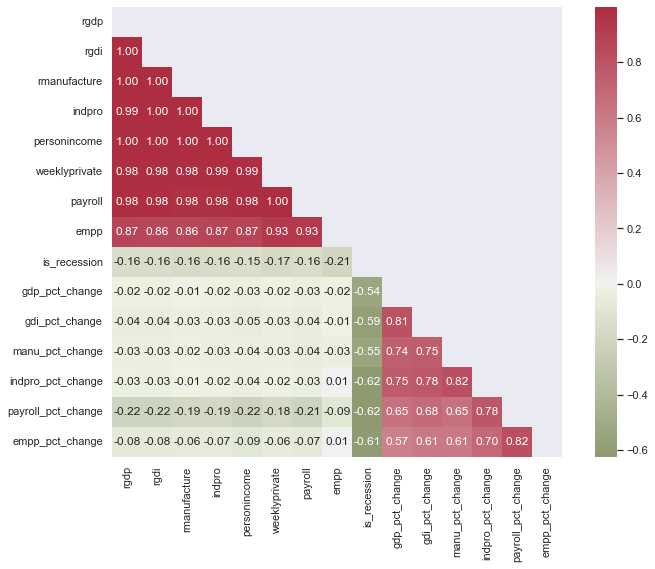

In [22]:
# check correlation
mask = np.triu(np.ones_like(nber_train_val.corr(), dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)
sns.heatmap(data=nber_train_val.corr(),mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)
plt.show()

### Key takeaway
- All those data revealed a negative correlation to the recession
- However, they could be a sufficient consequence rather than necessary consequence [^2]

### Whether the average industrial production in a recession is less than average in non-recession

- H0= The average industrial production in no recession is the same as the average industrial production in a recession
- Ha= The average industrial production in no recession is less than the average industrial production in a recession
- set alpha =0.05,(confidence level 95%)

In [23]:
explore.norm(nber_train_val.gdp_pct_change)

we assume the distribution of our variable is not normal/gaussian


recession industrial production variance: 385.9227244943526
no recession industrial production variance: 410.05761830931385
The average industrial production in no recession is not the same as the average industrial production in a recession


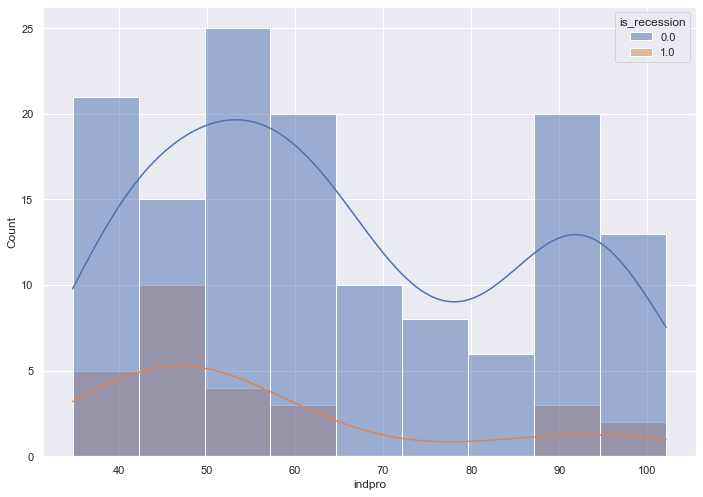

In [24]:
explore.nber_hypo1(nber_train_val)

### Key Takeaway
- This hypothesis proves that there is a potential negative relationship between industrial production and recession.

### Whether the whole dataset has normal distribution, and apply appropriate correlation test

In [25]:
# check if they are normal distribution
for col in nber_train_val.columns:
    target=nber_train_val
    print(explore.norm(target[col]),col)

we assume the distribution of our variable is not normal/gaussian
None rgdp
we assume the distribution of our variable is not normal/gaussian
None rgdi
we assume the distribution of our variable is not normal/gaussian
None rmanufacture
we assume the distribution of our variable is not normal/gaussian
None indpro
we assume the distribution of our variable is not normal/gaussian
None personincome
we assume the distribution of our variable is not normal/gaussian
None weeklyprivate
we assume the distribution of our variable is not normal/gaussian
None payroll
we assume the distribution of our variable is not normal/gaussian
None empp
we assume the distribution of our variable is not normal/gaussian
None is_recession
we assume the distribution of our variable is not normal/gaussian
None gdp_pct_change
we assume the distribution of our variable is normal/gaussian.
None gdi_pct_change
we assume the distribution of our variable is not normal/gaussian
None manu_pct_change
we assume the distribu

In [26]:
# applied spearman correlation test
nod=nber_train_val.drop(columns=['gdi_pct_change'])
for col in nod.columns:
    target=nod
    c,p=stats.spearmanr(target[col],nod.is_recession)
    print('correlation',c,'p_value',p,col)

correlation -0.17094232968256357 p_value 0.028143141884996014 rgdp
correlation -0.1743818131771826 p_value 0.02508193994088666 rgdi
correlation -0.19536266249435838 p_value 0.011914037541550893 rmanufacture
correlation -0.1847002636610395 p_value 0.017551238970390588 indpro
correlation -0.162687569295478 p_value 0.03681565000858979 personincome
correlation -0.15993726429316185 p_value 0.04016560817884932 weeklyprivate
correlation -0.1448022551234593 p_value 0.06350051765744692 payroll
correlation -0.18110065946687662 p_value 0.01991859323267443 empp
correlation 0.9999999999999999 p_value 0.0 is_recession
correlation -0.4859990177896627 p_value 3.6600025408080524e-11 gdp_pct_change
correlation -0.4725850321606487 p_value 1.4653993593952656e-10 manu_pct_change
correlation -0.5372473218594855 p_value 1.0099409744162687e-13 indpro_pct_change
correlation -0.5296804581713238 p_value 2.5683122151745696e-13 payroll_pct_change
correlation -0.5424536459416952 p_value 5.2416126004684915e-14 empp_

#### Key Takeaway
- As the heat map revealed, all of them a negative correlation to the recession

### Whether the net change of data (GDP,MANU,INDPRO,PAYROLL,EMP) increase correlation

In [27]:
# create new columns for the test
nber_train_val['net_change']=nber_train_val.iloc[:,-6:-1].sum(axis=1)

In [28]:
# check distribution normality and apply appropriate test
explore.norm(nber_train_val.net_change)
c,p=stats.spearmanr(nber_train_val.net_change,nod.is_recession)
c,p

we assume the distribution of our variable is not normal/gaussian


(-0.5678587249615945, 1.805453775600647e-15)

### key takeaway
- The net change of data doesn't increase the correlation value

### is GDI similar to payroll?

<AxesSubplot:xlabel='payroll_pct_change', ylabel='gdi_pct_change'>

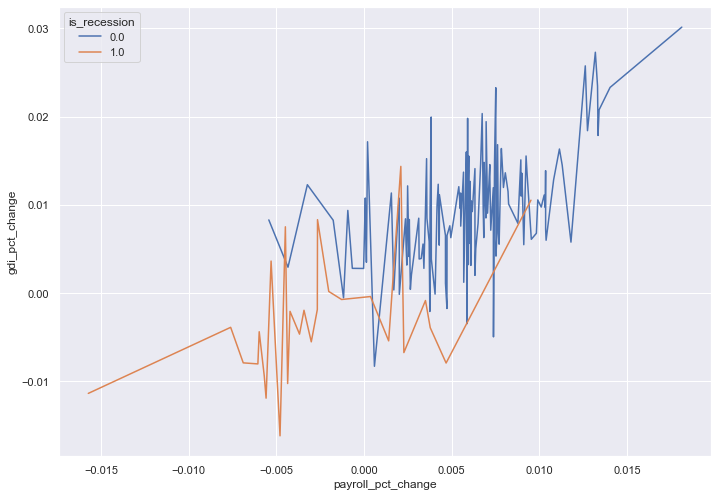

In [29]:
# use line plot
sns.lineplot(data=nber_train_val, y="gdi_pct_change", x="payroll_pct_change",hue='is_recession')

### Key Takeaway
- The majority of the payroll change is negative when in a recession
- gdi_pct_change is also remains little changed when in recession
- GDI is similar to payroll

## NBER exploration takeaway
- the percentage change has negative correlation with recession
- This is good data to use for the classification prediction because the United States is using those data to announce the recession

# Overall exploration takeaway
- [As the United States is taking multiple data to measure the recession](https://www.whitehouse.gov/cea/written-materials/2022/07/21/how-do-economists-determine-whether-the-economy-is-in-a-recession/), the NBER data did reveal a higher correlation with the recession compared to the other two datasets
- It is also unwise to speak on one single data to determine a recession
- The economy's overall performance and [monetary policies](https://www.federalreserve.gov/monetarypolicy/review-of-monetary-policy-strategy-tools-and-communications.htm) should be utilized to predict the recession.

# NBER based Model

In [30]:
# use created function to split them into x,yevaluate
x_train, y_train, x_validate, y_validate,x_test,y_test=model.model_split_(nber_train,nber_validate,nber_test)

In [31]:
# establish the baseline
baseline=(y_train==0).mean()
print('The baseline accuracy is ',baseline)

The baseline accuracy is  0.8


In [32]:
# evaluate the models
logrreg_m, dectre_m, ranfor_m, knn_m=model.modeling(x_train, y_train, x_validate, y_validate)

LogisticRegression(random_state=123)
                           
train score: 
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91        88
         1.0       0.80      0.36      0.50        22

    accuracy                           0.85       110
   macro avg       0.83      0.67      0.71       110
weighted avg       0.85      0.85      0.83       110

val score: 
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        50
         1.0       0.00      0.00      0.00         5

    accuracy                           0.91        55
   macro avg       0.45      0.50      0.48        55
weighted avg       0.83      0.91      0.87        55

                        
DecisionTreeClassifier(max_depth=5, random_state=123)
                           
train score: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        88
         1.0       1.00  

### Key takeaway
- the random forest has the best outcome, that the in-sample with max depth 5 achieved 100% accuracy and out-sample with max depth 5 achieved 98% accuracy and which will be utilized for the test sample

In [33]:
# put it on test
actual_test = y_test
pred_test = ranfor_m.predict(x_test)
print(classification_report(actual_test, pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        50
         1.0       0.75      1.00      0.86         6

    accuracy                           0.96        56
   macro avg       0.88      0.98      0.92        56
weighted avg       0.97      0.96      0.97        56



### Model Key Takeaway
- The model achieved 96% accuracy with 100% recall rate

# Recommendation, Conclusion, and Next Step

## Recommendation
- We should not believe there is recession based on single data
- The RandomForestClassifer can be used for our prediction

## Conclusion 
- In general, the data did show favor for two consecutive declines in GDP to call it a recession.
- The United States NBER used a different formula to call the recession; however, as noted in [README](https://github.com/QinzhiChen/individual_project), it could take a few months for NBER to announce it.
- The high unemployment rate doesn't mean there is a recession.
- The United States does not use the GDP-based formula to determine the recession, but an official determination came from NBER. Therefore, the hypothesis t-test can pass the null hypothesis.
- the percentage change has negative correlation with recession
- This is good data to use for the classification prediction because the United States is using those data to announce the recession

## Next Step
- Deploy the machine learning model
- Improvise the machine learning model
- Collect missing data

# Footnote
- All data are retirece from [FRED](https://fredhelp.stlouisfed.org/fred/about/about-fred/what-is-fred/)
-[^1]: https://www.cbo.gov/sites/default/files/110th-congress-2007-2008/workingpaper/2007-06_0.pdf
-[^2]: https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation#Usage,_and_meaning_of_'imply'